Travail realisé par Muthulingam Aginth

## Chargement des modules

In [315]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.impute import KNNImputer 

from sklearn import decomposition
from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Chargement des données nettoyés

In [200]:
Dataset_clean= pd.read_csv("df_openfood_clean.csv")

In [201]:
# Ajout d'une colonne nutrigrade
Dataset_clean['nutrigrade']='E'

In [202]:
Dataset_clean.loc[Dataset_clean['nutrition-score-fr_100g']<19,'nutrigrade']='D'
Dataset_clean.loc[Dataset_clean['nutrition-score-fr_100g']<11,'nutrigrade']='C'
Dataset_clean.loc[Dataset_clean['nutrition-score-fr_100g']<3,'nutrigrade']='B'
Dataset_clean.loc[Dataset_clean['nutrition-score-fr_100g']<=0,'nutrigrade']='A'

In [203]:
Dataset_clean

,product_name,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,fiber_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrigrade
0,- AVRAMENTO-TERMIN,711.0,1.6,19.0,17.466667,9.6,0.8,0.0,0.000000,2.2,0.475000,0.000060,0.002000,0.076667,0.000847,13.333333,D
1,- Roasted Eggplant,142.0,0.0,8.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.460000,0.000000,0.010367,0.005667,0.000093,5.000000,C
2,Milka Bubbles,2280.0,5.4,59.0,58.500000,31.5,16.5,0.0,0.021333,0.2,0.150000,0.000000,0.000000,0.106000,0.002180,27.000000,E
3,&quot;Fit GO!&quot;,477.0,4.3,7.1,4.236667,7.1,3.2,0.0,0.018000,7.0,0.130000,0.000156,0.012167,0.124333,0.000973,16.666667,D
4,(Jayeon-eun Teunteun),188.0,0.0,10.5,10.500000,0.0,0.0,0.0,0.000000,0.0,0.005000,0.000000,0.021000,0.002000,0.000187,10.333333,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165799,zarte Heringsfilets in Tomatensauce,774.0,11.8,6.5,4.800000,12.2,2.1,0.0,0.074667,0.1,0.500000,0.000051,0.003533,0.047667,0.001460,5.000000,C
165800,zero calorie syrup,18.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.1,0.216535,0.000214,0.000000,0.151667,0.000097,1.000000,B
165801,zevia,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.016000,0.000000,0.000000,6.666667,C
165802,zumo Bi frutas,88.0,0.3,4.8,4.800000,0.0,0.0,0.0,0.000000,0.5,0.011811,0.000120,0.016667,0.011333,0.000000,1.000000,B


In [204]:
Dataset_clean.describe()

,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,fiber_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000,165804.000000
mean,1065.003837,6.696504,32.128833,14.782769,10.659746,4.394161,0.023792,0.016356,1.942602,0.434083,0.000110,0.008618,0.072012,0.001328,9.377723
std,735.385010,7.169103,27.815191,19.599606,14.556065,6.431726,0.176784,0.027262,2.857289,0.850803,0.000279,0.018633,0.131774,0.002115,8.844986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,385.000000,0.800000,6.670000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1046.000000,4.700000,23.330000,5.130000,4.170000,1.400000,0.000000,0.000000,0.800000,0.232000,0.000020,0.000667,0.029000,0.000670,10.000000
75%,1611.000000,9.800000,59.000000,22.200000,17.000000,6.500000,0.000000,0.022167,2.900000,0.533000,0.000107,0.008100,0.087000,0.001847,16.000000
max,3586.000000,40.000000,99.900000,95.000000,93.330000,50.000000,3.600000,0.205000,28.600000,12.222000,0.003750,0.260900,1.071000,0.028120,40.000000


## Analyse Univariés

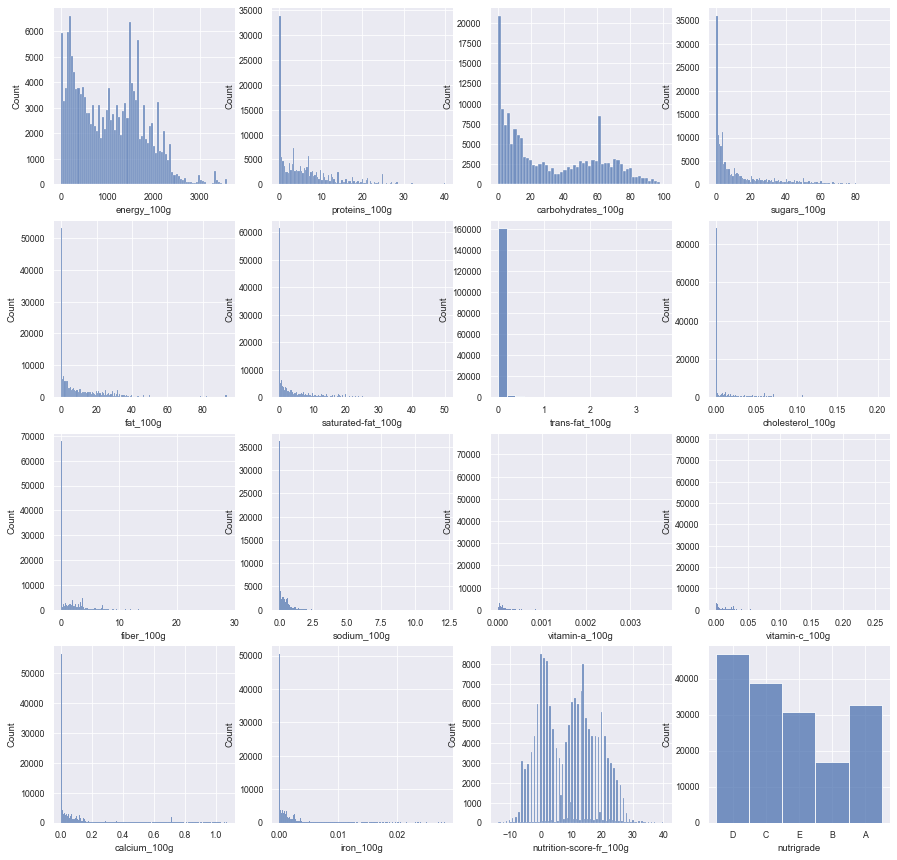

In [205]:
fig, axs = plt.subplots(4,4,figsize=(15,15))
axs = axs.ravel()
a=0
col=list(Dataset_clean.columns)[1:]
for i in col: 
    sns.histplot(Dataset_clean[i],ax=axs[a])
    a+=1
plt.show()

##  Analyse bivariés

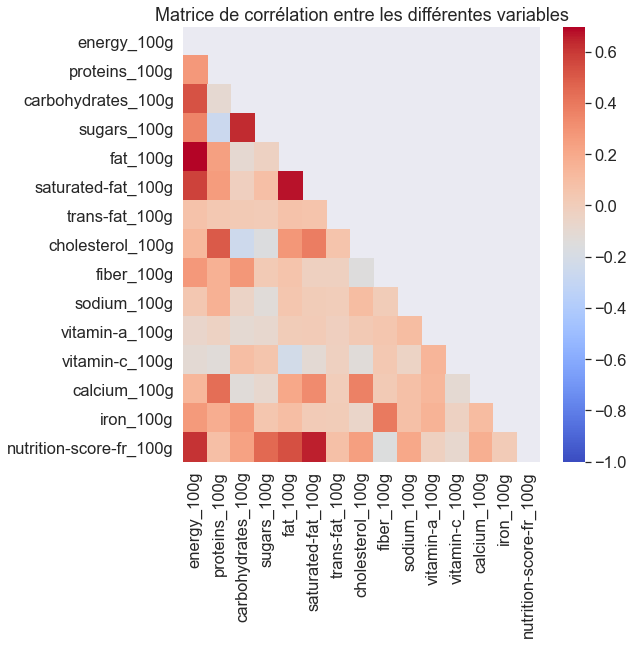

In [206]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation entre les différentes variables')

corr = Dataset_clean.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

<Figure size 1440x1440 with 0 Axes>

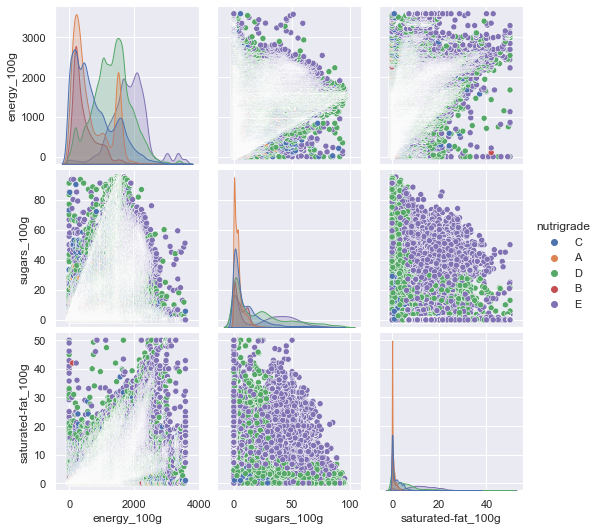

In [207]:
Dataset_clean_tri2=Dataset_clean.copy().sort_values(by='energy_100g')
#sns.lineplot(Dataset_clean_tri2['nutrigrade'], Dataset_clean_tri2['energy_100g'])
plt.figure(figsize=(20,20))

col=['energy_100g','sugars_100g','saturated-fat_100g','nutrigrade']

sns.pairplot(Dataset_clean_tri2[col], kind='scatter', hue='nutrigrade')
#sns.scatterplot(data=Dataset_clean_tri2, x="energy_100g", y="saturated-fat_100g", hue="nutrigrade")

##  ACP

In [208]:
data_pca = Dataset_clean.copy()

In [209]:
col_pca=Dataset_clean.columns[1:-2]
Y = data_pca['nutrigrade']
X = data_pca[col_pca].values

names=data_pca['product_name']

features=data_pca[col_pca].columns
n_comp=14

In [210]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [211]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=14)

In [316]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

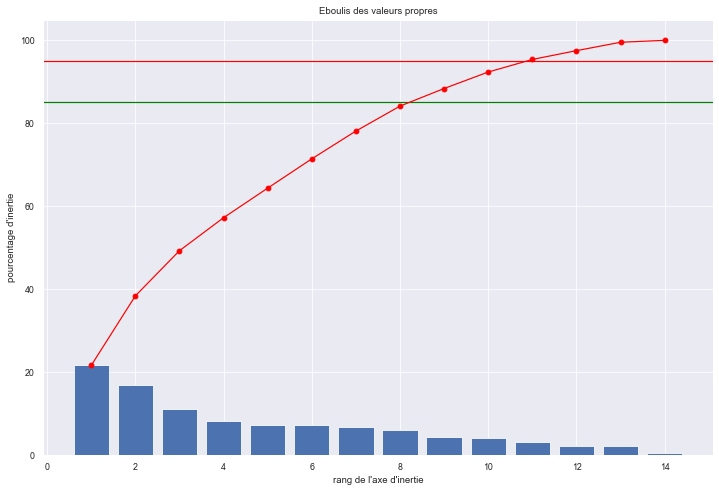

In [317]:
# Eboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.axhline(y=95,color='red')
plt.axhline(y=85,color='green')
display_scree_plot(pca)

In [333]:
# Fonction permettant le tracé des cercle de correlations

from matplotlib.patches import Circle

def display_circle (pca_components_,ls_comp,col_pca) :
    
    comp1 = ls_comp[0]
    comp2= ls_comp[1]
    sns.set_context("paper", font_scale=1.5) 
    plt.figure(figsize=(14,14))
    chaine = "Plan factoriel pour les composantes "+str(comp1+1)+" & "+str(comp2+1)+" de l'ACP"
    plt.title(chaine)
    x_lab = 'Composante '+str(comp1+1) ; y_lab = 'Composante '+str(comp2+1)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    ax = plt.gca()
    ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-'))
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    x_pca = pca_components_[comp1,:]
    y_pca = pca_components_[comp2,:]

    sns.scatterplot(x = x_pca, y = y_pca)
    plt.plot([-1,1],[0,0], color='grey')
    plt.plot([0,0],[-1,1], color='grey')

    i = 0
    for x,y,colonne in zip(x_pca,y_pca, col_pca):

        plt.annotate(colonne, (x,y), textcoords="offset points", xytext=(0,5+np.random.randint(-10,10)), ha='center') 
        ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


    sns.set_context("paper", font_scale=1) 
    
    return 

def display_factorial_plane (data_pca,col_pca,pca_components_,ls_comp) :
    comp1 = ls_comp[0]
    comp2 = ls_comp[1]
    
    x_show = pca.transform(data_pca[col_pca])[:,comp1]
    y_show = pca.transform(data_pca[col_pca])[:,comp2]
    hue_show = data_pca['nutrigrade']
    
    sns.set_context("paper", font_scale=1.5) 
    plt.figure(figsize=(14,14))
    chaine = "Plan factoriel pour les composantes "+str(comp1+1)+" & "+str(comp2+1)+" de l'ACP"
    plt.title(chaine)
    x_lab = 'Composante '+str(comp1+1) ; y_lab = 'Composante '+str(comp2+1)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    ax = plt.gca()

    ax.set_xlim(-1000,1000)
    ax.set_ylim(-1000,1000)
    x_pca = pca.components_[comp1,:]*500
    y_pca = pca.components_[comp2,:]*500

    sns.scatterplot(x = x_pca,y = y_pca)
    sns.scatterplot(x = x_show,y = y_show,hue = hue_show, s=20)
    plt.plot([-1,1],[0,0], color='grey')
    plt.plot([0,0],[-1,1], color='grey')

    i = 0
    for x,y,colonne in zip(x_pca,y_pca, col_pca):

        plt.annotate(colonne,(x,y),textcoords="offset points",xytext=(0,5+np.random.randint(-10,10)),ha='center')
        ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


    sns.set_context("paper", font_scale=1) 

    return

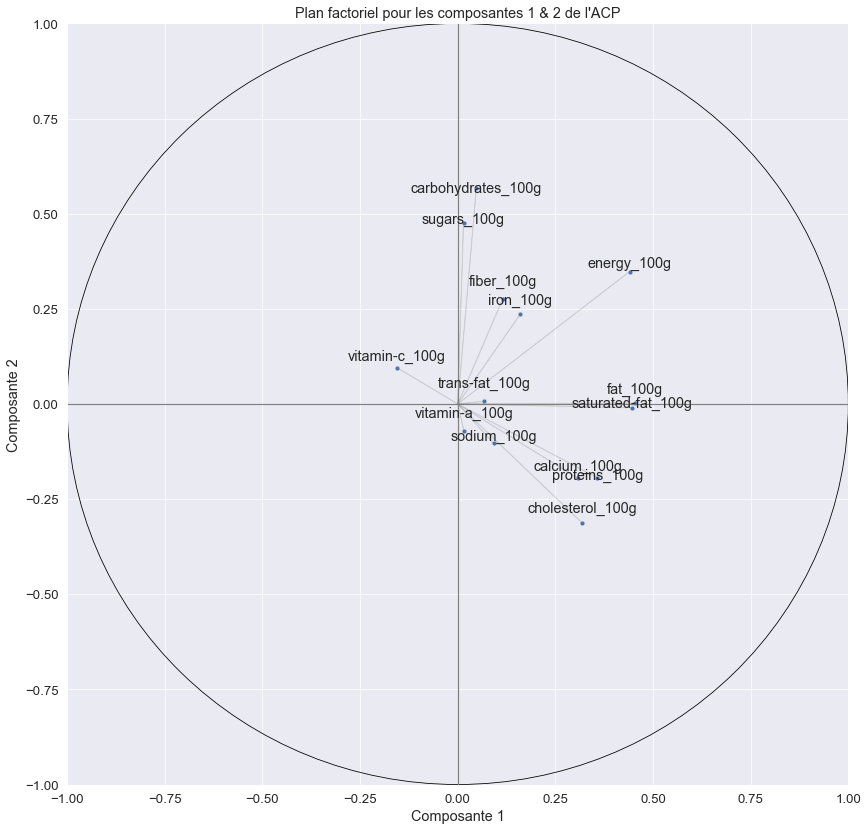

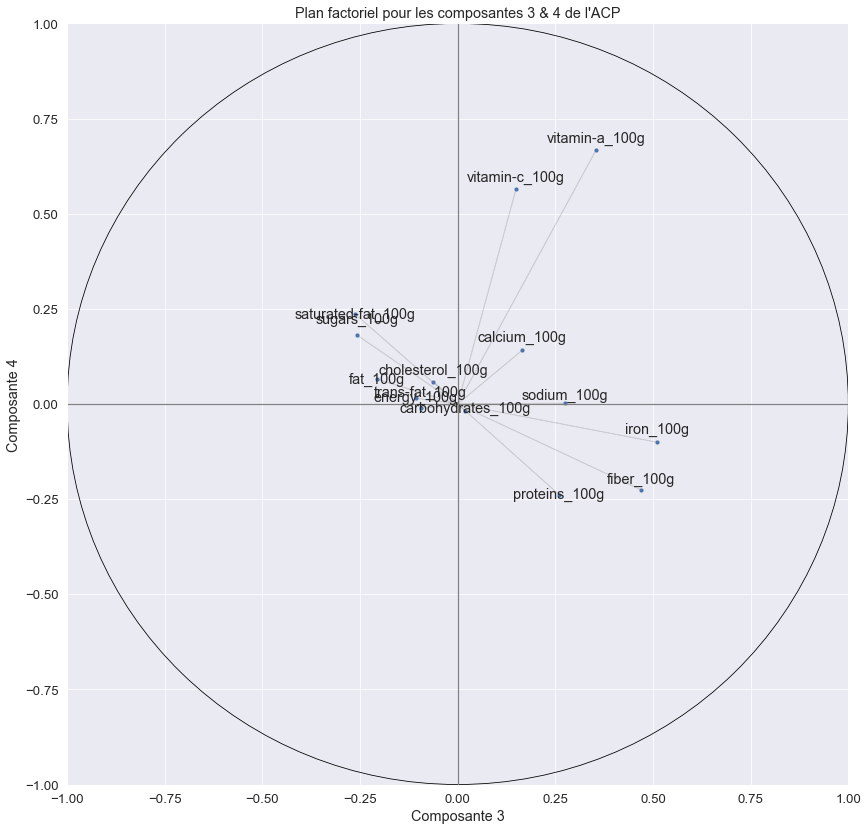

In [334]:
#Cercle des corrélations
pcs = pca.components_
ls_comp =  [(0,1),(2,3)] #,(4,5),(6,7)]
for i in ls_comp :
    display_circle(pcs,i,col_pca)

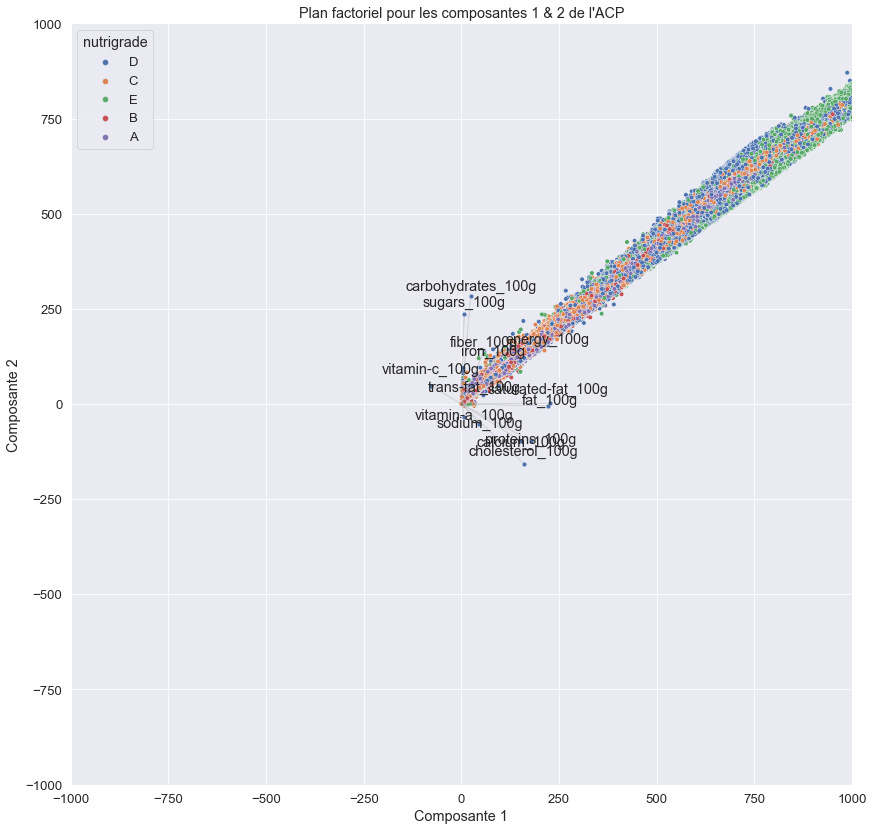

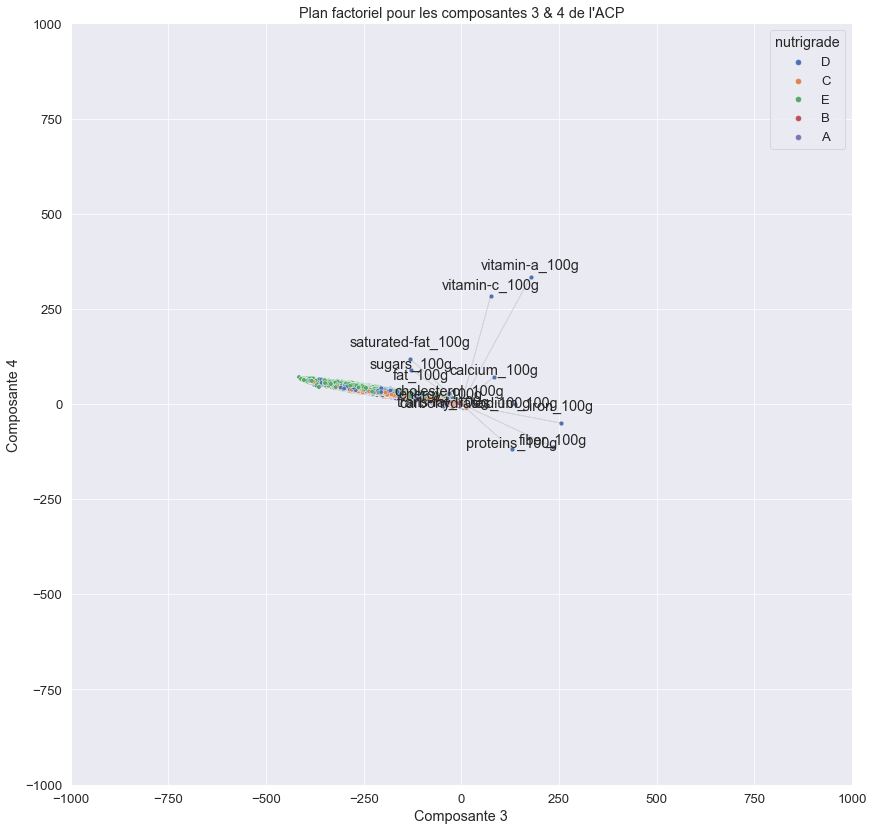

In [335]:
#Cercle des corrélations
pcs = pca.components_
ls_comp =  [(0,1),(2,3)] #,(4,5),(6,7)]
for i in ls_comp :
    display_factorial_plane(data_pca,col_pca,pcs,i)

## Classification

In [216]:
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier  
from sklearn.utils import resample

In [293]:
index_ech= list(np.random.randint(165804,size=5500))
index_ech=list(set(index_ech))

In [295]:
echantillon=Dataset_clean.copy().iloc[index_ech]

In [298]:
col_knn = ['energy_100g','carbohydrates_100g','sugars_100g','fiber_100g','iron_100g','fat_100g','saturated-fat_100g']
data_knn=echantillon[col_knn]
target_knn=echantillon['nutrigrade']

In [299]:
x_train, x_test, y_train,  y_test = train_test_split(data_knn,target_knn, train_size=0.8)

#### KNN

In [300]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)

In [301]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [302]:
(1-model.score(x_test,y_test))

0.47962962962962963

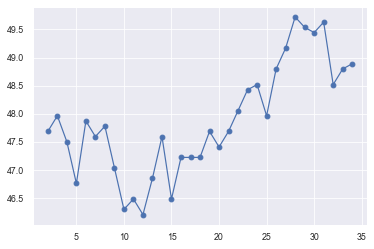

In [303]:
errors=[]
for k in range(2,35):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - knn.fit(x_train,y_train).score(x_test,y_test)))
    
plt.plot(range(2,35),errors,'o-')
plt.show()

#### Random Forest

In [304]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)
(1-clf.score(x_test,y_test))

0.4046296296296297

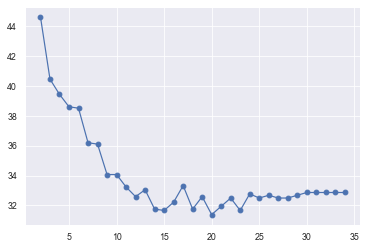

In [305]:
errors=[]
for d in range(2,35):
    rf=RandomForestClassifier(max_depth=d, random_state=0)
    errors.append(100*(1 - rf.fit(x_train,y_train).score(x_test,y_test)))
    
plt.plot(range(2,35),errors,'o-')
plt.show()

#### Calcul nutriscore

| Points| energy_100g |saturated-fat_100g |sugars_100g |sodium_100g |
| --- | --- | --- | --- | --- |
|0|0|0|0.0|0 |
|1|335|1|4.5|0.90 |
|2|670|2|9.0|1.80 |
|3|1005|3|13.5|2.70 |
|4|1340|4|18.0|3.60 |
|5|1675|5|22.5|4.50 |
|6|2010|6|27.0|5.40 |
|7|2345|7|31.0|6.30 |
|8|2680|8|36.0|7.20 |
|9|3015|9|40.0|8.10 |
|10|3350|10|45.0|9.00 |
**Tableau N : Point negative calcul nutricore**


|Points|fiber_100g|proteins_100g|
| --- | --- | --- |
|0|0.0|0.0|
|1|0.9 |1.6|
|2|1.9|3.2|
|3|2.8 |4.8|
|4|3.7|6.4|
|5|4.7 |8.0|
**Tableau P : Point positive calcul nutricore**

Calcul nutriscore = N-P <br>
On décide de calculer le nutriscore avec la formule ci dessus afin de voir si notre modèle est pertinent 

In [342]:
tab_n= pd.read_csv("tab_N_nutriscore.csv",sep='\t')
tab_p = pd.read_csv("tab_P_nutriscore.csv",sep='\t')

In [343]:
tab_n

,Points,energy_100g,saturated-fat_100g,sugars_100g,sodium_100g
0,0,0,0,0.0,0.0
1,1,335,1,4.5,0.9
2,2,670,2,9.0,1.8
3,3,1005,3,13.5,2.7
4,4,1340,4,18.0,3.6
5,5,1675,5,22.5,4.5
6,6,2010,6,27.0,5.4
7,7,2345,7,31.0,6.3
8,8,2680,8,36.0,7.2
9,9,3015,9,40.0,8.1


In [344]:
def calcul_nutriscore (df,tab_n,tab_p):
    dataset=df.copy()
    col_n = ['energy_100g','sugars_100g','saturated-fat_100g']
    col_p = ['fiber_100g','proteins_100g']
    dataset['nutriscore_predit']=0
    
    for j in dataset.index :
        for i in col_p :
            p=tab_p[tab_p[i]<=float(dataset[i][j])].sort_values(by=i,ascending=False).index[0]
            dataset['nutriscore_predit'][j]-=tab_p['Points'][p]

        for k in col_n :
            n=tab_n[tab_n[k]<=dataset[k][j]].sort_values(by=k,ascending=False).index[0]
            dataset['nutriscore_predit'][j]+=tab_n['Points'][n]
    
    dataset['nutrigrade_predit'] = 'E'
    dataset.loc[dataset['nutriscore_predit']<19,'nutrigrade_predit']='D'
    dataset.loc[dataset['nutriscore_predit']<11,'nutrigrade_predit']='C'
    dataset.loc[dataset['nutriscore_predit']<3,'nutrigrade_predit']='B'
    dataset.loc[dataset['nutriscore_predit']<=0,'nutrigrade_predit']='A'
    
    return dataset

In [345]:
a = calcul_nutriscore (Dataset_clean.loc[list(echantillon.index)],tab_n,tab_p)

In [346]:
erreur=0
for j in a.index:
    if a['nutrigrade'][j]!=a['nutrigrade_predit'][j]:
        erreur+=1/len(a)
        
erreur

0.5636464702612544

On consate que le taux d'erreur avec un calcul simplifié du nutriscore est supérieur à notre deux modèle.
On peut donc dire que les modèles sont pertinent et celle-ci peuvent être améliorer si on règle les hyperparamètres de manières plus précise